In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df=pd.read_csv("books.csv",error_bad_lines=False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6564\3518446508.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("books.csv",error_bad_lines=False)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
df.shape

(11123, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [6]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['title'].unique

<bound method Series.unique of 0        Harry Potter and the Half-Blood Prince (Harry ...
1        Harry Potter and the Order of the Phoenix (Har...
2        Harry Potter and the Chamber of Secrets (Harry...
3        Harry Potter and the Prisoner of Azkaban (Harr...
4        Harry Potter Boxed Set  Books 1-5 (Harry Potte...
                               ...                        
11118     Expelled from Eden: A William T. Vollmann Reader
11119                          You Bright and Risen Angels
11120                      The Ice-Shirt (Seven Dreams #1)
11121                                          Poor People
11122                          Las aventuras de Tom Sawyer
Name: title, Length: 11123, dtype: object>

In [9]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [10]:
df['authors'].unique

<bound method Series.unique of 0                               J.K. Rowling/Mary GrandPré
1                               J.K. Rowling/Mary GrandPré
2                                             J.K. Rowling
3                               J.K. Rowling/Mary GrandPré
4                               J.K. Rowling/Mary GrandPré
                               ...                        
11118    William T. Vollmann/Larry McCaffery/Michael He...
11119                                  William T. Vollmann
11120                                  William T. Vollmann
11121                                  William T. Vollmann
11122                                           Mark Twain
Name: authors, Length: 11123, dtype: object>

In [11]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [12]:
df.groupby('title')['authors'].value_counts()

title                                                                                                                          authors                         
  said the shotgun to the head.                                                                                                Saul Williams                       1
$30 Film School: How to Write  Direct  Produce  Shoot  Edit  Distribute  Tour With  and Sell Your Own No-Budget Digital Movie  Michael W. Dean                     1
'Salem's Lot                                                                                                                   Stephen King                        5
                                                                                                                               Stephen King/Ron McLarty            2
                                                                                                                               Stephen King/Jerry N. Uelsmann      1
               

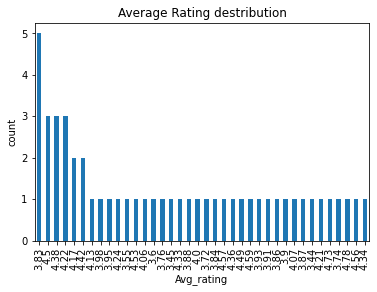

In [13]:
df['average_rating'].head(50).value_counts().plot(kind='bar')
plt.title('Average Rating destribution')
plt.xlabel('Avg_rating')
plt.ylabel('count')
plt.show()

In [14]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [15]:
x=df[['average_rating','ratings_count']].values

In [16]:
x

array([[4.570000e+00, 2.095690e+06],
       [4.490000e+00, 2.153167e+06],
       [4.420000e+00, 6.333000e+03],
       ...,
       [3.960000e+00, 8.200000e+02],
       [3.720000e+00, 7.690000e+02],
       [3.910000e+00, 1.130000e+02]])

In [17]:
X = df[['average_rating', 'ratings_count']]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [19]:
wcss=[]

for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)


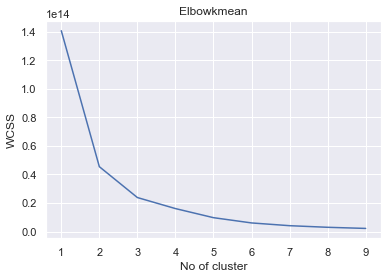

In [20]:
sns.set()
plt.title("Elbowkmean")
plt.xlabel('No of cluster')
plt.ylabel('WCSS')
plt.plot(range(1,10),wcss)
plt.show()

In [21]:
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df['cluster_label'] = kmeans.fit_predict(X_scaled)

In [22]:
df.title.values

array(['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
       'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
       'Harry Potter and the Chamber of Secrets (Harry Potter  #2)', ...,
       'The Ice-Shirt (Seven Dreams #1)', 'Poor People',
       'Las aventuras de Tom Sawyer'], dtype=object)

In [23]:

def recommend_books_kmeans(book_title, num_recommendations=5):
    book_row = df[df['title'] == book_title]
    
    if book_row.empty:
        return []  
    
    cluster_label = book_row['cluster_label'].values[0]
    
    similar_books = df[df['cluster_label'] == cluster_label]
    
    similar_books = similar_books[similar_books['title'] != book_title]
    similar_books = similar_books.sort_values(by=['average_rating', 'ratings_count'], ascending=[False, False])
    recommended_books = similar_books['title'].head(num_recommendations).tolist()    
    return recommended_books
    
def recommend_books_by_partial_name(partial, num_recommendations=5):
    all_books_names = list(df.title.values)
    matching_books = []
    for name in all_books_names:
        if partial.lower() in name.lower():
            matching_books.append(name)
    if len(matching_books) > num_recommendations:
        matching_books = matching_books[:num_recommendations]

    return matching_books



In [24]:
partial_name = "Harry"  
partial_recommendations = recommend_books_by_partial_name(partial_name, num_recommendations=5)

print("Recommended Books:")
for i, book in enumerate(partial_recommendations, 1):
    print(f"{i}. {book}")

Recommended Books:
1. Harry Potter and the Half-Blood Prince (Harry Potter  #6)
2. Harry Potter and the Order of the Phoenix (Harry Potter  #5)
3. Harry Potter and the Chamber of Secrets (Harry Potter  #2)
4. Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)
5. Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)


In [25]:
user_input = "Poor People"  # Replace with the user's input
recommendations = recommend_books_kmeans(user_input)
print("Recommended Books:" )
for i, book in enumerate(recommendations, 1):
    print(f"{i}. {book}")

Recommended Books:
1. The God Delusion
2. The Constant Princess (The Plantagenet and Tudor Novels  #6)
3. Blue Like Jazz: Nonreligious Thoughts on Christian Spirituality
4. Pygmalion
5. Tara Road


In [26]:
x

array([[4.570000e+00, 2.095690e+06],
       [4.490000e+00, 2.153167e+06],
       [4.420000e+00, 6.333000e+03],
       ...,
       [3.960000e+00, 8.200000e+02],
       [3.720000e+00, 7.690000e+02],
       [3.910000e+00, 1.130000e+02]])